In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('kütüphaneler başarılı bir şekilde yüklendi')

kütüphaneler başarılı bir şekilde yüklendi


In [ ]:
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')

In [ ]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train.dtypes

,0
label,int64
pixel0,int64
pixel1,int64
pixel2,int64
pixel3,int64
...,...
pixel779,int64
pixel780,int64
pixel781,int64
pixel782,int64


In [ ]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data_train.shape)
print(data_test.shape)

(42000, 785)
(28000, 784)


In [ ]:
data_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
data_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [ ]:
data_boyut = data_train.shape
data_boyut

(42000, 785)

In [ ]:
data_boyut = data_test.shape
data_boyut

(28000, 784)

Ön İşleme
Bu adımda veriler temizlenir ve ön işleme uygulanır. Kullanılan veri kümesi, her rakamın 784 pikselden oluşan bir formatta temsil edildiği basit bir yapıya sahiptir.

In [ ]:
# Eğitim ve test verileri için numpy dizileri oluşturma
# Etiket sütununu ayır ve diğer sütunları eğitim verisi olarak al
egitim_verisi = data_train.drop(["label"], axis=1).values
etiketler = data_train["label"].values
test_verisi = data_test.values

# Sonuçları doğrulama
print(egitim_verisi[:5, :])
print('------------------------------------')
print(etiketler[:5])
print('------------------------------------')
print(test_verisi[:5, :])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------------------
[1 0 1 4 0]
------------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Verilerin NumPy dizilerine dönüştürüldüğünü kontrol et
print(f"egitim_verisi türü: {type(egitim_verisi)}")
print(f"etiketler türü: {type(etiketler)}")

egitim_verisi türü: <class 'numpy.ndarray'>
etiketler türü: <class 'numpy.ndarray'>


In [ ]:
# Veriyi %75 eğitim ve %25 doğrulama seti olarak ayır
x_egitim, x_dogrulama, y_egitim, y_dogrulama = train_test_split(
    egitim_verisi, etiketler, test_size=0.25, random_state=42
)

# Ayrılmış verilerin boyutlarını kontrol et
print(x_egitim.shape, y_egitim.shape, x_dogrulama.shape, y_dogrulama.shape)

(31500, 784) (31500,) (10500, 784) (10500,)


In [ ]:
# Eğitim setinden bir görüntü seç
tek_goruntu = x_egitim[1]

# Görüntünün boyutunu kontrol et
print(tek_goruntu.shape)

(784,)


8


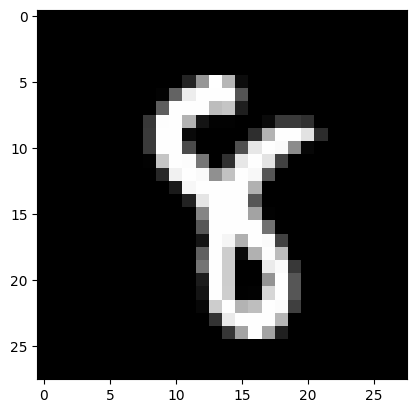

In [ ]:
# Özellik ve etiketlerin nasıl çalıştığını gör
ornek_indis = 1

# Etiketi yazdır
print(y_egitim[ornek_indis])

# Görüntüyü çizdir
plt.imshow(x_egitim[ornek_indis].reshape(28, 28), cmap="gray")

1


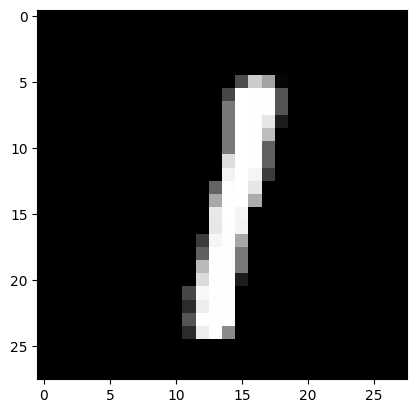

In [ ]:
# Örnek bir indis belirle ve ilgili etiketi yazdır
ornek_indis = 8
print(y_egitim[ornek_indis])

# İlgili görüntüyü görselleştir
plt.imshow(x_egitim[ornek_indis].reshape(28, 28), cmap="gray")

In [ ]:
# CNN'in anlayabilmesi için etiketleri one-hot encoding formatına dönüştür
y_kategori_egitim = to_categorical(y_egitim, num_classes=10)
y_kategori_dogrulama = to_categorical(y_dogrulama, num_classes=10)

# Örneğin, yukarıdaki i=8 için one-hot encoded değeri göster
y_kategori_egitim[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# İlk birkaç doğrulama etiketini yazdır
print(y_dogrulama[:5])

# İlk birkaç doğrulama etiketinin one-hot encoded halini incele
y_kategori_dogrulama[:5, :]

[8 1 9 9 8]


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

Normalizasyon işlemi , Eğitim seti oluşturma test etme

In [ ]:
#Verileri 0 ile 1 Arasında Ölçeklendirme
# Veriyi 255'e bölerek ölçeklendir
x_egitim = x_egitim / 255.0
x_dogrulama = x_dogrulama / 255.0
test_verisi = test_verisi / 255.0

In [ ]:
#Ölçeklenmiş Tekil Bir Görüntüyü Almak
# Eğitim setinden bir görüntü seç
olceklenmis_goruntu = x_egitim[0]

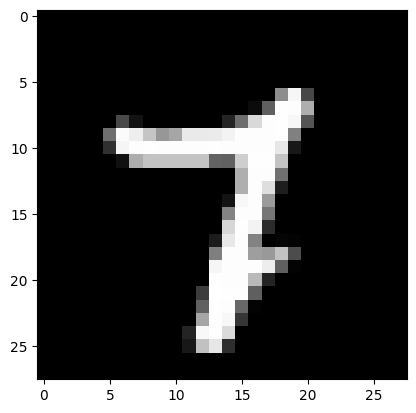

In [ ]:
#Görüntüyü Görselleştirme
# Ölçeklenmiş görüntüyü çizdir
plt.imshow(olceklenmis_goruntu.reshape(28, 28), cmap="gray")

In [ ]:
#Eğitim Setini 4 Boyutlu Hale Getirme
# Eğitim setini 4 boyutlu bir yapıya dönüştür
x_egitim = x_egitim.reshape(31500, 28, 28, 1)
print(x_egitim.shape)

(31500, 28, 28, 1)


In [ ]:
# Doğrulama Setini 4 Boyutlu Hale Getirme
# Doğrulama setini 4 boyutlu bir yapıya dönüştür
x_dogrulama = x_dogrulama.reshape(10500, 28, 28, 1)
print(x_dogrulama.shape)

(10500, 28, 28, 1)


In [ ]:
#Test Setini 4 Boyutlu Hale Getirme
# Test setini 4 boyutlu bir yapıya dönüştür
test_verisi = test_verisi.reshape(28000, 28, 28, 1)
print(test_verisi.shape)

(28000, 28, 28, 1)


Model yapımı :
Burada sinir ağı modelinin mimarisini tanımlıyoruz.


In [ ]:
# ipython-input-8-556a08a0d411

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

# MNIST verilerini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Verileri yeniden şekillendir
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# Verileri normalleştir
x_train = x_train / 255.0
x_test = x_test / 255.0

# Eğitim ve doğrulama setlerini ayır
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Logistic Regression modelini oluştur ve eğit
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

# Doğrulama setinde tahmin yap
y_pred = log_reg.predict(x_val) # y_pred is calculated here

# Doğrulama doğruluğunu hesapla ve yazdır
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.9223


In [ ]:
# Test verisi üzerinde tahmin yap
test_tahminler = log_reg.predict(x_test)

In [ ]:
# Kaggle yarışmasının veri küpünden eğitim verisini yükle
egitim_verisi = pd.read_csv('/content/train.csv')

# Özellikler ve etiketleri ayır
X_egitim = egitim_verisi.drop('label', axis=1)
y_egitim = egitim_verisi['label']

# Eğitim verilerini CNN giriş formatına uygun şekilde yeniden şekillendir (28x28 piksel, 1 kanal)
X_egitim = X_egitim.values.reshape(-1, 28, 28, 1)

# Piksel değerlerini (0-255) aralığından (0-1) aralığına ölçeklendir
X_egitim = X_egitim / 255.0

# Veriyi eğitim ve doğrulama setlerine ayır
X_egitim_ayrik, X_dogrulama, y_egitim_ayrik, y_dogrulama = train_test_split(
    X_egitim, y_egitim, test_size=0.2, random_state=42
)

# CNN modelini oluştur
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # 28x28 gri tonlamalı görüntüler için giriş katmanı
    layers.Conv2D(32, (3, 3), activation='relu'),  # 32 filtreli ilk evrişim katmanı
    layers.MaxPooling2D((2, 2)),  # İlk Max-Pooling katmanı
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filtreli ikinci evrişim katmanı
    layers.MaxPooling2D((2, 2)),  # İkinci Max-Pooling katmanı
    layers.Flatten(),  # Görüntüyü düzleştirme
    layers.Dense(64, activation='relu'),  # 64 birimli tam bağlı katman
    layers.Dense(10, activation='softmax')  # Çıkış katmanı: 10 birim (rakamlar 0-9)
])

# Modeli derle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
gecmis = model.fit(
    X_egitim_ayrik, y_egitim_ayrik,
    epochs=10,
    validation_data=(X_dogrulama, y_dogrulama)
)

# Modeli kaydet
model.save('rakam_tanima_cnn.h5')

# Son doğrulama doğruluğunu yazdır
dogrulama_dogrulugu = model.evaluate(X_dogrulama, y_dogrulama, verbose=2)
print(f'Doğrulama Doğruluğu: {dogrulama_dogrulugu[1]:.4f}')

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.8603 - loss: 0.4375 - val_accuracy: 0.9762 - val_loss: 0.0784
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.9803 - loss: 0.0647 - val_accuracy: 0.9857 - val_loss: 0.0470
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9852 - loss: 0.0446 - val_accuracy: 0.9777 - val_loss: 0.0652
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9897 - loss: 0.0311 - val_accuracy: 0.9902 - val_loss: 0.0354
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9914 - loss: 0.0260 - val_accuracy: 0.9870 - val_loss: 0.0438
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9804 - val_loss: 0.0567
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.9951 - loss: 0.0147 - val_accuracy: 0.9801 - val_loss: 0.0686
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9961 -

263/263 - 2s - 8ms/step - accuracy: 0.9889 - loss: 0.0388
Doğrulama Doğruluğu: 0.9889


In [ ]:
# Test verisini yükle
test_verisi = pd.read_csv('/content/test.csv')

# Test verilerini CNN giriş formatına uygun şekilde yeniden şekillendir (28x28 piksel, 1 kanal)
X_test = test_verisi.values.reshape(-1, 28, 28, 1)

# Piksel değerlerini (0-255) aralığından (0-1) aralığına ölçeklendir
X_test = X_test / 255.0

# Daha önce eğitilmiş modeli yükle (eğer önceden kaydedilmiş model kullanılacaksa)
model = tf.keras.models.load_model('rakam_tanima_cnn.h5')

# Test verileri üzerinde tahmin yap
test_tahminleri = model.predict(X_test)
tahmin_edilen_etiketler = np.argmax(test_tahminleri, axis=1)  # En yüksek olasılığın indeksini al

# Sonuçları içeren bir DataFrame oluştur
sonuc_dosyasi = pd.DataFrame({
    'GoruntuID': np.arange(1, len(tahmin_edilen_etiketler) + 1),
    'Etiket': tahmin_edilen_etiketler
})

# Sonuç dosyasını CSV olarak kaydet
sonuc_dosyasi.to_csv('rakam_tanima_sonuc.csv', index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step


<Axes: >

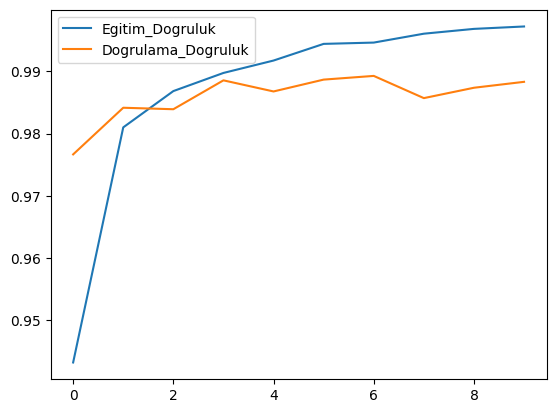

In [ ]:
# Eğitim ve doğrulama doğruluğunu içeren grafiği çiz
pd.DataFrame({
    'Egitim_Dogruluk': history.history['accuracy'],
    'Dogrulama_Dogruluk': history.history['val_accuracy']
}).plot()

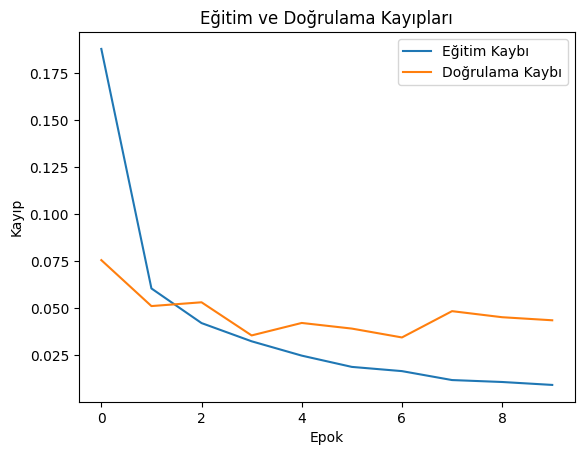

In [ ]:
import matplotlib.pyplot as plt  # plt modülünü içe aktar
# Eğitim ve doğrulama kayıplarını çiz
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epok')
plt.ylabel('Kayıp')
plt.title('Eğitim ve Doğrulama Kayıpları')
plt.legend()
plt.show()


875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step


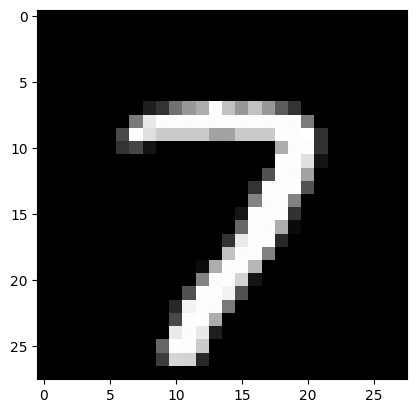

In [32]:
import numpy as np  # Gerekli kütüphaneyi içe aktar

# Test seti üzerinde tahmin yap
tahminler = model.predict(X_test)

# Rastgele bir örneği seç ve sonucu gör
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
#plt.title(f"Gerçek: {np.argmax(y_test[index])}, Tahmin: {np.argmax(tahminler[index])}")
plt.show()
